In [1]:
import csv
import ast
import re


# discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\\u4e00-\\u9fa5^a-z^A-Z\\x20]")
    return res.sub(restr, desstr)


# search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while (fib_next < length):
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while (fib_next > 1):
        i = min(offset + fib_N_2, length - 1)
        if (arr[i]['id_str'] < key):
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif (arr[i]['id_str'] > key):
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if (fib_N_1 and offset < length - 1) and (arr[offset + 1]['id_str'] == key):
        return arr[offset + 1]['full_text']
    return 'NaN'


# store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(f'{path}') as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: a})


# main procedure
def word_frequency_func(word_list_1 = []):
    result = []
    store = []
    #dict_store = dict()
    #new_store = []
    with open('result.csv', mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        'conversations_18332190_vader.csv',
        'conversations_20626359_vader.csv',
        'conversations_22536055_vader.csv',
        'conversations_26223583_vader.csv',
        'conversations_38676903_vader.csv',
        'conversations_45621423_vader.csv',
        'conversations_56377143_vader.csv',
        'conversations_106062176_vader.csv',
        'conversations_124476322_vader.csv',
        'conversations_218730857_vader.csv',
        'conversations_253340062_vader.csv',
        'conversations_1542862735_vader.csv']

    for j in file_list:
        open_file(j, store, result)
    """
    for k in store:
        for K_2 in k:
            k_1 = k[K_2].split()
            for word in k_1:
                if word not in dict_store:
                    dict_store[word] = 1
                else:
                    dict_store[word] += 1
    
    for words in dict_store:
        new_store.append({'word': words, 'frequency': dict_store[words]})
    
    head = ['word', 'frequency']
    with open('word_frequency.csv', mode="w", encoding="utf-8-sig", newline="") as f:
        write = csv.DictWriter(f, head)
        write.writeheader()
        write.writerows(new_store)
    """

    word_list = word_list_1

    word_com_dict = dict()
    for word_com in word_list:
        for str_dict in store:
            for str_id in str_dict:
                if word_com in str_dict[str_id]:
                    if word_com not in word_com_dict:
                        word_com_dict[word_com] = [str_id]
                    else:
                        word_com_dict[word_com].append(str_id)

    return word_com_dict


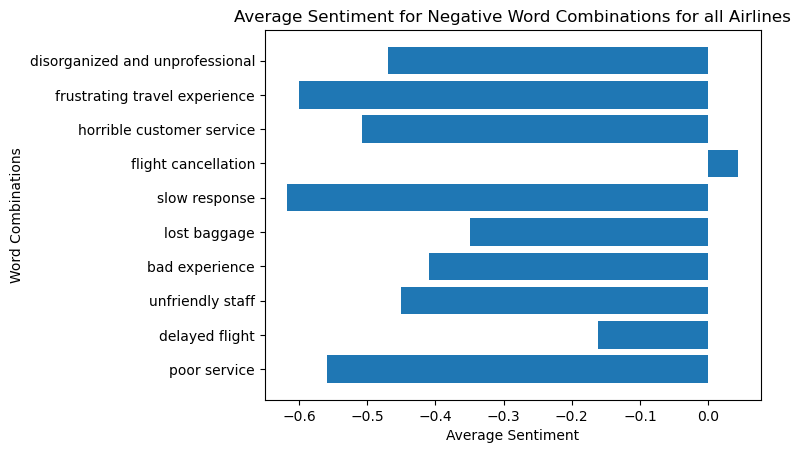

In [2]:
import csv
import ast
import re
import matplotlib.pyplot as plt

# Discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\u4e00-\u9fa5^a-z^A-Z\x20]")
    return res.sub(restr, desstr)

# Search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while fib_next < length:
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while fib_next > 1:
        i = min(offset + fib_N_2, length - 1)
        if arr[i]['id_str'] < key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif arr[i]['id_str'] > key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if fib_N_1 and offset < length - 1 and arr[offset + 1]['id_str'] == key:
        return arr[offset + 1]['full_text']
    return 'NaN'

# Store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(path) as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: {'sentiment': float(i_1[0]), 'full_text': a}})

# Function that calculates the average sentiment of a word combination
def calculate_average_sentiment(word_list, store):
    word_sentiment = {}
    for word_com in word_list:
        sentiment_sum = 0
        sentiment_count = 0
        for str_dict in store:
            for str_id in str_dict:
                if word_com in str_dict[str_id]['full_text']:
                    sentiment = str_dict[str_id]['sentiment']
                    sentiment_sum += sentiment
                    sentiment_count += 1
        if sentiment_count > 0:
            average_sentiment = sentiment_sum / sentiment_count
            word_sentiment[word_com] = average_sentiment
    return word_sentiment

# Main procedure
def word_frequency_func(word_list):
    result = []
    store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_18332190_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_20626359_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_22536055_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_26223583_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_38676903_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_45621423_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_56377143_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_106062176_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_218730857_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_253340062_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_1542862735_vader.csv"
    ]

    for j in file_list:
        open_file(j, store, result)

    # Calling the average sentiment function
    word_sentiment = calculate_average_sentiment(word_list, store)

    # Create lists of word combinations and average sentiments
    word_combinations = list(word_sentiment.keys())
    average_sentiments = list(word_sentiment.values())

    # Plotting
    plt.barh(word_combinations, average_sentiments)
    plt.xlabel('Average Sentiment')
    plt.ylabel('Word Combinations')
    plt.title('Average Sentiment for Negative Word Combinations for all Airlines')
    plt.show()

# input
word_list = [
    'poor service',
    'delayed flight',
    'unfriendly staff',
    'bad experience',
    'lost baggage',
    'slow response',
    'flight cancellation',
    'horrible customer service',
    'frustrating travel experience',
    'disorganized and unprofessional'
]

word_frequency_func(word_list)


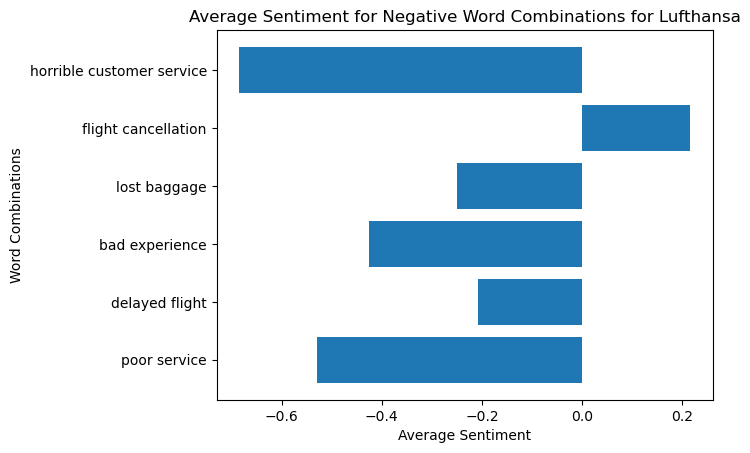

In [3]:
import csv
import ast
import re
import matplotlib.pyplot as plt

# Discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\u4e00-\u9fa5^a-z^A-Z\x20]")
    return res.sub(restr, desstr)

# Search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while fib_next < length:
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while fib_next > 1:
        i = min(offset + fib_N_2, length - 1)
        if arr[i]['id_str'] < key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif arr[i]['id_str'] > key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if fib_N_1 and offset < length - 1 and arr[offset + 1]['id_str'] == key:
        return arr[offset + 1]['full_text']
    return 'NaN'

# Store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(path) as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: {'sentiment': float(i_1[0]), 'full_text': a}})

# Function that calculates the average sentiment of a word combination
def calculate_average_sentiment(word_list, store):
    word_sentiment = {}
    for word_com in word_list:
        sentiment_sum = 0
        sentiment_count = 0
        for str_dict in store:
            for str_id in str_dict:
                if word_com in str_dict[str_id]['full_text']:
                    sentiment = str_dict[str_id]['sentiment']
                    sentiment_sum += sentiment
                    sentiment_count += 1
        if sentiment_count > 0:
            average_sentiment = sentiment_sum / sentiment_count
            word_sentiment[word_com] = average_sentiment
    return word_sentiment

# Main procedure
def word_frequency_func(word_list):
    result = []
    store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        ]

    for j in file_list:
        open_file(j, store, result)

    # Calling the average sentiment function
    word_sentiment = calculate_average_sentiment(word_list, store)

    # Create lists of word combinations and average sentiments
    word_combinations = list(word_sentiment.keys())
    average_sentiments = list(word_sentiment.values())

    # Plotting
    plt.barh(word_combinations, average_sentiments)
    plt.xlabel('Average Sentiment')
    plt.ylabel('Word Combinations')
    plt.title('Average Sentiment for Negative Word Combinations for Lufthansa')
    plt.show()

# input
word_list = [
    'poor service',
    'delayed flight',
    'unfriendly staff',
    'bad experience',
    'lost baggage',
    'slow response',
    'flight cancellation',
    'horrible customer service',
    'frustrating travel experience',
    'disorganized and unprofessional'
]

word_frequency_func(word_list)


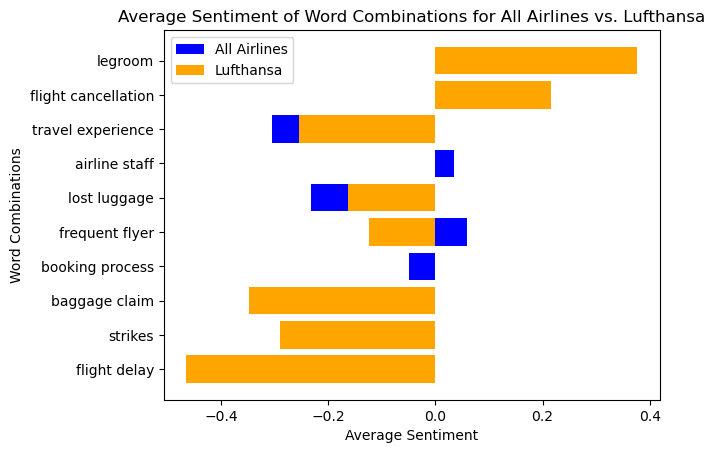

In [1]:
import csv
import ast
import re
import matplotlib.pyplot as plt

# Discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\u4e00-\u9fa5^a-z^A-Z\x20]")
    return res.sub(restr, desstr)

# Search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while fib_next < length:
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while fib_next > 1:
        i = min(offset + fib_N_2, length - 1)
        if arr[i]['id_str'] < key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif arr[i]['id_str'] > key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if fib_N_1 and offset < length - 1 and arr[offset + 1]['id_str'] == key:
        return arr[offset + 1]['full_text']
    return 'NaN'

# Store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(path) as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: {'sentiment': float(i_1[0]), 'full_text': a}})

# Calculates the average sentiment of a word combination
def calculate_average_sentiment(word_list, store):
    word_sentiment = {}
    for word in word_list:
        sentiment_sum = 0
        count = 0
        for str_dict in store:
            for str_id, data in str_dict.items():
                if word in data['full_text']:
                    sentiment = data['sentiment']
                    sentiment_sum += sentiment
                    count += 1
        if count > 0:
            average_sentiment = sentiment_sum / count
        else:
            average_sentiment = 0  # Assign a default value for words not found
        word_sentiment[word] = average_sentiment
    return word_sentiment

def word_frequency_func(word_list):
    luft_result = []
    luft_store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        luft_read = csv.DictReader(f)
        for i in luft_read:
            luft_result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        ]

    for j in file_list:
        open_file(j, luft_store, luft_result)

    result = []
    store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_18332190_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_20626359_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_22536055_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_26223583_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_38676903_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_45621423_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_56377143_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_106062176_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_218730857_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_253340062_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_1542862735_vader.csv"
    ]

    for j in file_list:
        open_file(j, store, result)

    # Calling the average sentiment function for all airlines
    word_sentiment = calculate_average_sentiment(word_list, store)
    word_combinations = list(word_sentiment.keys())
    average_sentiments = list(word_sentiment.values())

    # Calling the average sentiment function for lufthansa
    luft_word_sentiment = calculate_average_sentiment(word_list, luft_store)
    luft_word_combinations = list(luft_word_sentiment.keys())
    luft_average_sentiments = list(luft_word_sentiment.values())
    
    
    # Plotting
    plt.barh(word_list, average_sentiments, color='blue', label='All Airlines')
    plt.barh(word_list, luft_average_sentiments, color='orange', label='Lufthansa')
    plt.xlabel('Average Sentiment')
    plt.ylabel('Word Combinations')
    plt.title('Average Sentiment of Word Combinations for All Airlines vs. Lufthansa')
    plt.legend()
    plt.show()

# input
word_list = [
    'flight delay',
    'strikes',
    'baggage claim',
    'booking process',
    'frequent flyer',
    'lost luggage',
    'airline staff',
    'travel experience',
    'flight cancellation',
    'legroom'
]

word_frequency_func(word_list)


In [7]:
import csv
import ast
import re

# Discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\u4e00-\u9fa5^a-z^A-Z\x20]")
    return res.sub(restr, desstr)

# Search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while fib_next < length:
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while fib_next > 1:
        i = min(offset + fib_N_2, length - 1)
        if arr[i]['id_str'] < key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif arr[i]['id_str'] > key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if fib_N_1 and offset < length - 1 and arr[offset + 1]['id_str'] == key:
        return arr[offset + 1]['full_text']
    return 'NaN'

# Store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(path) as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: {'sentiment': float(i_1[0]), 'full_text': a}})

# Calculates the average sentiment of a word combination
def calculate_average_sentiment(word_list, store):
    word_sentiment = {}
    for word in word_list:
        sentiment_sum = 0
        count = 0
        for str_dict in store:
            for str_id, data in str_dict.items():
                if word in data['full_text']:
                    sentiment = data['sentiment']
                    sentiment_sum += sentiment
                    count += 1
        if count > 0:
            average_sentiment = sentiment_sum / count
        else:
            average_sentiment = 0  # Assign a default value for words not found
        word_sentiment[word] = average_sentiment
    return word_sentiment

def save_results_to_csv(word_list):
    luft_result = []
    luft_store = []

    with open(r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        luft_read = csv.DictReader(f)
        for i in luft_read:
            luft_result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
    ]

    for j in file_list:
        open_file(j, luft_store, luft_result)

    result = []
    store = []

    with open(r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_18332190_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_20626359_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_22536055_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_26223583_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_38676903_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_45621423_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_56377143_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_106062176_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_218730857_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_253340062_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_1542862735_vader.csv"
    ]

    for j in file_list:
        open_file(j, store, result)

    word_sentiment_luft = calculate_average_sentiment(word_list, luft_store)
    word_sentiment_general = calculate_average_sentiment(word_list, store)

    with open(r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\average_sentiment.csv", mode='w', newline='') as f:
        fieldnames = ['Word Combination', 'All Airlines', 'Lufthansa']
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for word in word_list:
            writer.writerow({'Word Combination': word, 'All Airlines': word_sentiment_general[word], 'Lufthansa': word_sentiment_luft[word]})

    print("csv file written")
    
# input
word_list = [
    'flight delay',
    'strikes',
    'baggage claim',
    'booking process',
    'frequent flyer',
    'lost luggage',
    'airline staff',
    'travel experience',
    'flight cancellation',
    'legroom'
]

save_results_to_csv(word_list)

Results saved to average_sentiment_1.csv.


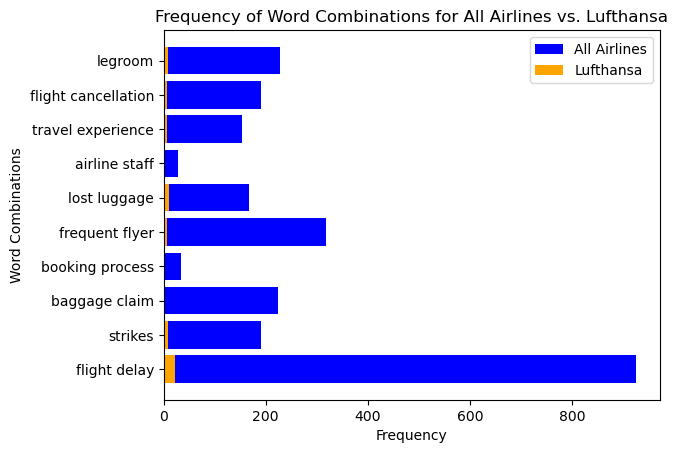

In [21]:
import csv
import ast
import re
import matplotlib.pyplot as plt

# Discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\u4e00-\u9fa5^a-z^A-Z\x20]")
    return res.sub(restr, desstr)

# Search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while fib_next < length:
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while fib_next > 1:
        i = min(offset + fib_N_2, length - 1)
        if arr[i]['id_str'] < key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif arr[i]['id_str'] > key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if fib_N_1 and offset < length - 1 and arr[offset + 1]['id_str'] == key:
        return arr[offset + 1]['full_text']
    return 'NaN'

# Store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(path) as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: {'sentiment': float(i_1[0]), 'full_text': a}})

# Calculates the frequency of a word combination
def calculate_word_frequency(word_list, store):
    word_frequency = {}
    for word in word_list:
        frequency = 0
        for str_dict in store:
            for str_id, data in str_dict.items():
                if word in data['full_text']:
                    frequency += 1
        word_frequency[word] = frequency
    return word_frequency

def word_frequency_func(word_list):
    luft_result = []
    luft_store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        luft_read = csv.DictReader(f)
        for i in luft_read:
            luft_result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        ]

    for j in file_list:
        open_file(j, luft_store, luft_result)

    result = []
    store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_18332190_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_20626359_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_22536055_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_26223583_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_38676903_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_45621423_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_56377143_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_106062176_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_218730857_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_253340062_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_1542862735_vader.csv"
    ]

    for j in file_list:
        open_file(j, store, result)

    # Calling the word frequency function for all airlines
    word_frequency = calculate_word_frequency(word_list, store)
    word_combinations = list(word_frequency.keys())
    frequencies = list(word_frequency.values())

    # Calling the word frequency function for Lufthansa
    luft_word_frequency = calculate_word_frequency(word_list, luft_store)
    luft_word_combinations = list(luft_word_frequency.keys())
    luft_frequencies = list(luft_word_frequency.values())
    
    # Plotting
    plt.barh(word_list, frequencies, color='blue', label='All Airlines')
    plt.barh(word_list, luft_frequencies, color='orange', label='Lufthansa')
    plt.xlabel('Frequency')
    plt.ylabel('Word Combinations')
    plt.title('Frequency of Word Combinations for All Airlines vs. Lufthansa')
    plt.legend()
    plt.show()

# input
word_list = [
    'flight delay',
    'strikes',
    'baggage claim',
    'booking process',
    'frequent flyer',
    'lost luggage',
    'airline staff',
    'travel experience',
    'flight cancellation',
    'legroom'
]

word_frequency_func(word_list)

In [9]:
import csv
import ast
import re

# Discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\u4e00-\u9fa5^a-z^A-Z\x20]")
    return res.sub(restr, desstr)

# Search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while fib_next < length:
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while fib_next > 1:
        i = min(offset + fib_N_2, length - 1)
        if arr[i]['id_str'] < key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif arr[i]['id_str'] > key:
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if fib_N_1 and offset < length - 1 and arr[offset + 1]['id_str'] == key:
        return arr[offset + 1]['full_text']
    return 'NaN'

# Store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(path) as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: {'sentiment': float(i_1[0]), 'full_text': a}})

# Calculates the frequency of a word combination
def calculate_word_frequency(word_list, store):
    word_frequency = {}
    for word in word_list:
        frequency = 0
        for str_dict in store:
            for str_id, data in str_dict.items():
                if word in data['full_text']:
                    frequency += 1
        word_frequency[word] = frequency
    return word_frequency

def word_frequency_func(word_list):
    luft_result = []
    luft_store = []

    with open(r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        luft_read = csv.DictReader(f)
        for i in luft_read:
            luft_result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
    ]

    for j in file_list:
        open_file(j, luft_store, luft_result)

    result = []
    store = []

    with open(r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_18332190_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_20626359_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_22536055_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_26223583_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_38676903_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_45621423_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_56377143_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_106062176_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_218730857_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_253340062_vader.csv",
        r"C:\Users\20223661\Downloads\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_1542862735_vader.csv"
    ]

    for j in file_list:
        open_file(j, store, result)

    # Calling the word frequency function for all airlines
    word_frequency = calculate_word_frequency(word_list, store)
    word_combinations = list(word_frequency.keys())
    frequencies = list(word_frequency.values())

    # Calling the word frequency function for Lufthansa
    luft_word_frequency = calculate_word_frequency(word_list, luft_store)
    luft_word_combinations = list(luft_word_frequency.keys())
    luft_frequencies = list(luft_word_frequency.values())
    
    # Save the results to a csv file
    with open("word_frequency.csv", mode="w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["Word Combination", "All Airlines", "Lufthansa"])
        for word in word_combinations:
            all_airlines_freq = word_frequency.get(word, 0)
            lufthansa_freq = luft_word_frequency.get(word, 0)
            writer.writerow([word, all_airlines_freq, lufthansa_freq])

# input
word_list = [
    'flight delay',
    'strikes',
    'baggage claim',
    'booking process',
    'frequent flyer',
    'lost luggage',
    'airline staff',
    'travel experience',
    'flight cancellation',
    'legroom'
]

word_frequency_func(word_list)

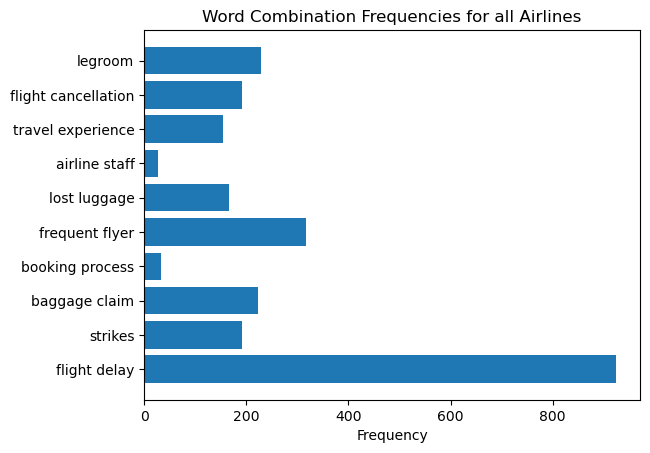

In [18]:
import csv
import ast
import re
import matplotlib.pyplot as plt


# discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\\u4e00-\\u9fa5^a-z^A-Z\\x20]")
    return res.sub(restr, desstr)


# search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while (fib_next < length):
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while (fib_next > 1):
        i = min(offset + fib_N_2, length - 1)
        if (arr[i]['id_str'] < key):
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif (arr[i]['id_str'] > key):
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if (fib_N_1 and offset < length - 1) and (arr[offset + 1]['id_str'] == key):
        return arr[offset + 1]['full_text']
    return 'NaN'


# store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(f'{path}') as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: a})


# main procedure
def word_frequency_func(word_list):
    result = []
    store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_18332190_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_20626359_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_22536055_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_26223583_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_38676903_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_45621423_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_56377143_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_106062176_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_218730857_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_253340062_vader.csv",
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_1542862735_vader.csv"]

    for j in file_list:
        open_file(j, store, result)

    word_com_dict = dict()
    for word_com in word_list:
        for str_dict in store:
            for str_id in str_dict:
                if word_com in str_dict[str_id]:
                    if word_com not in word_com_dict:
                        word_com_dict[word_com] = [str_id]
                    else:
                        word_com_dict[word_com].append(str_id)

    # frequencies for each word
    frequencies = [len(word_com_dict.get(word, [])) for word in word_list]

    # Plotting
    plt.barh(word_list, frequencies)
    plt.xlabel('Frequency')
    plt.title('Word Combination Frequencies for all Airlines')
    plt.show()

word_list = [
    'flight delay',
    'strikes',
    'baggage claim',
    'booking process',
    'frequent flyer',
    'lost luggage',
    'airline staff',
    'travel experience',
    'flight cancellation',
    'legroom'
]

word_frequency_func(word_list)

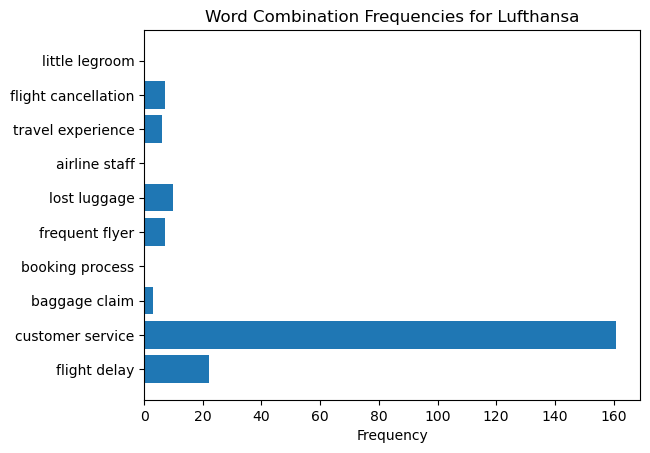

In [17]:
import csv
import ast
import re
import matplotlib.pyplot as plt


# discard emoji
def filter_str(desstr, restr=''):
    res = re.compile("[^\\u4e00-\\u9fa5^a-z^A-Z\\x20]")
    return res.sub(restr, desstr)


# search full text in result
def fibonacci_text_search(key, arr):
    fib_N_2 = 0  # F(k-2)
    fib_N_1 = 1  # F(k-1)
    fib_next = fib_N_1 + fib_N_2  # F(n)=F(n-1)+F(n-2)
    length = len(arr)

    while (fib_next < length):
        fib_N_2 = fib_N_1
        fib_N_1 = fib_next
        fib_next = fib_N_2 + fib_N_1

    offset = -1

    while (fib_next > 1):
        i = min(offset + fib_N_2, length - 1)
        if (arr[i]['id_str'] < key):
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
            offset = i
        elif (arr[i]['id_str'] > key):
            fib_next = fib_N_1
            fib_N_1 = fib_N_2
            fib_N_2 = fib_next - fib_N_1
        else:
            return arr[i]['full_text']

    if (fib_N_1 and offset < length - 1) and (arr[offset + 1]['id_str'] == key):
        return arr[offset + 1]['full_text']
    return 'NaN'


# store full text in a list (data structure: [{id:full_text},{id:full_text}...,{id:full_text}])
def open_file(path, store, result):
    with open(f'{path}') as f:
        read = csv.DictReader(f)
        for i in read:
            i = dict(i)
            i_1 = ast.literal_eval(i['full_conversation_vader'])
            if i_1[0] != 'NaN':
                a = fibonacci_text_search(i['id_str'], result)
                a = a.lower()
                a = filter_str(a)
                a = ' '.join(a.split())
                store.append({i['id_str']: a})


# main procedure
def word_frequency_func(word_list):
    result = []
    store = []

    with open(r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\result.csv", mode='r', encoding='utf-8') as f:
        read = csv.DictReader(f)
        for i in read:
            result.append(dict(i))

    file_list = [
        r"C:\Users\20223661\OneDrive - TU Eindhoven\Documents\Git\DBL 18\Di, Tri Diagrams\dbl-data-challenge-Files\dbl-data-challenge-Files\conversations_124476322_vader.csv",
        ]

    for j in file_list:
        open_file(j, store, result)

    word_com_dict = dict()
    for word_com in word_list:
        for str_dict in store:
            for str_id in str_dict:
                if word_com in str_dict[str_id]:
                    if word_com not in word_com_dict:
                        word_com_dict[word_com] = [str_id]
                    else:
                        word_com_dict[word_com].append(str_id)

    # frequencies for each word
    frequencies = [len(word_com_dict.get(word, [])) for word in word_list]

    # Plotting
    plt.barh(word_list, frequencies)
    plt.xlabel('Frequency')
    plt.title('Word Combination Frequencies for Lufthansa')
    plt.show()

word_list = [
    'flight delay',
    'customer service',
    'baggage claim',
    'booking process',
    'frequent flyer',
    'lost luggage',
    'airline staff',
    'travel experience',
    'flight cancellation',
    'little legroom'
]

word_frequency_func(word_list)